# Introduction

## Project Overview

At Salifort Motors, the Human Resources (HR) department is focused on enhancing employee retention by understanding the factors that influence an employee's decision to leave the company. With a dataset containing detailed employee information, the challenge is to analyze this data and build a predictive model to address the following key question:

**What factors are likely to make an employee leave the company?**

## Problem Statement

Employee turnover can be costly for any organization due to the time and resources required for recruitment and training. By identifying the key predictors of employee attrition, Salifort Motors aims to proactively address these issues and improve overall employee satisfaction and retention.

## Dataset Description
### Familiarize yourself with the HR dataset
The dataset provided for this project includes 14,999 rows and 10 columns with the following variables:


The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Objectives

1. **Predictive Modeling**: Develop a predictive model to determine the likelihood of an employee leaving the company. Both logistic regression and tree-based machine learning models will be considered.
   
2. **Feature Analysis**: Identify the most significant factors contributing to employee attrition. This will involve exploring the impact of different variables and their interactions.

3. **Data Visualization**: Create visualizations to help interpret the findings and communicate insights effectively to stakeholders.

## Impact

By accurately predicting employee attrition and understanding the underlying factors, HR can implement targeted strategies to improve retention. This might include enhancing job satisfaction, addressing common issues, and providing career development opportunities. The insights gained will enable Salifort Motors to make data-driven decisions that contribute to a more stable and satisfied workforce.

## Ethical Considerations

While analyzing employee data, it is crucial to ensure that the process adheres to ethical standards. Privacy and confidentiality of employee information must be maintained, and the analysis should be used to support positive organizational changes rather than punitive measures.

## PACE Framework

This project follows the PACE framework, which consists of four stages: **Plan**, **Analyze**, **Construct**, and **Execute**. Each stage helps structure the project systematically:


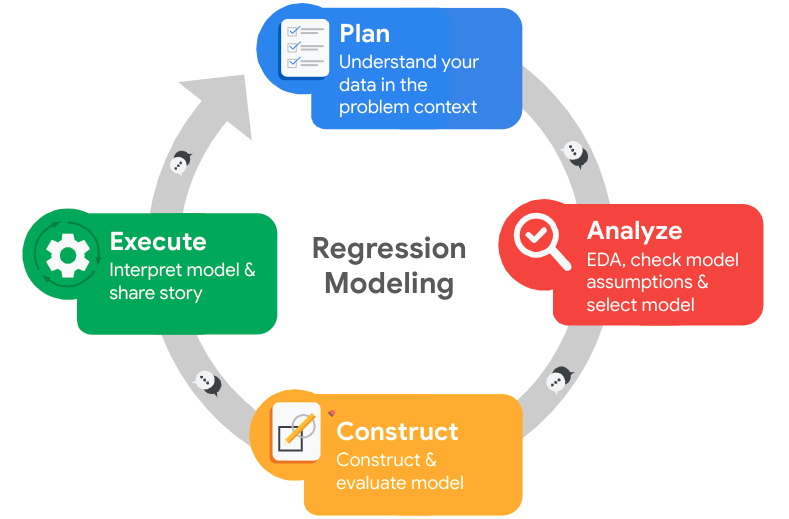

## **Pace: Plan**
In the **Plan** stage, our primary focus is to understand the business problem and how the data can be used to address it

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
ConfusionMatrixDisplay, classification_report, roc_auc_score
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.38             0.53               2                   157  \
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department   
0                   3              0     1                      0      sales  \
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project   
count        14999.000000     14999.000000    14999.000000  \
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left   
count          14999.000000        14999.000000   14999.000000  14999.000000  \
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
df0.rename(columns = {"Department": "department", "Work_accident": "work_accident"
                     ,"average_montly_hours" : "average_monthly_hours",
                     "time_spend_company" : "tenure"}, inplace = True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
df0.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

satisfaction_level  last_evaluation  number_project   
396                  0.46             0.57               2  \
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  tenure  work_accident  left   
396                      139       3              0     1  \
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1

satisfaction_level  last_evaluation  number_project   
0                    0.38             0.53               2  \
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_monthly_hours  tenure  work_accident  left   
0                        157       3              0     1  \
1                        262       6              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
...                      ...     ...            ...   ...   
11995                    259      10              1     0   
11996                    266      10              0     0   
11997                    185      10              0     0   
11998                    172      10              0     0   
11999                    180       3              0     0   

       promotion_last_5years  department  salary  
0                          0       sales     low  
1                          0       sales  medium  
2                          0       sales  medium  
3                          0       sales     low  
4                          0       sales     low  
...                      ...         ...     ...  
11995                      1  management    high  
11996                      1  management    high  
11997                      1  management    high  
11998                      1   marketing    high  
11999                      0          IT     low  

[11991 rows x 10 columns]

### Check outliers

Check for outliers in the data.

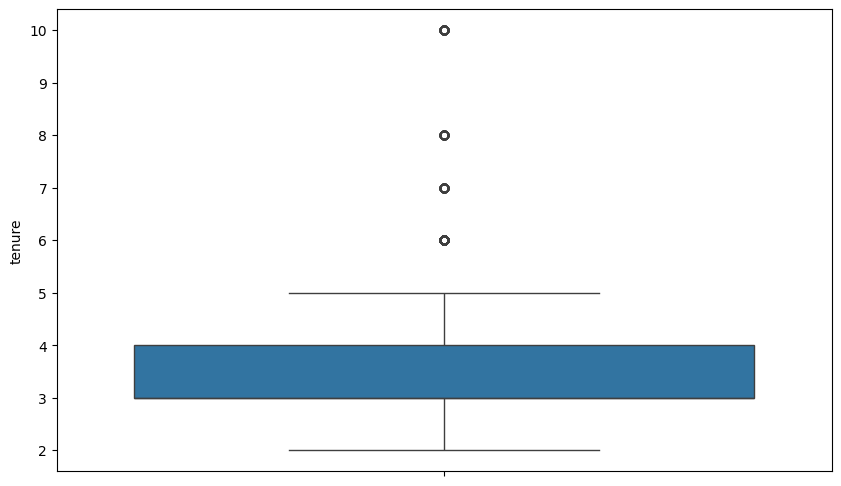

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig = plt.figure(figsize = (10, 6))
sns.boxplot(df1["tenure"])
plt.show()

In [ ]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
len(df1.loc[df1["tenure"] > 5])

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

In [ ]:
def outlier_counter(columns_list, iqr_factor):
    for column in columns_list:
        #df1.loc[df1[column] < 0, column] = 0
        q1 = df1[column].quantile(0.25)
        q3 = df1[column].quantile(0.75)
        iqr = q3 - q1
        lower_treshold = q1 - (iqr * iqr_factor)
        upper_treshold = q3 + (iqr * iqr_factor)
        print(column)
        print("Q1 : ",q1)
        print("Q3 : ",q3)
        print("Lower Treshold :",lower_treshold)
        print("Upper Treshold :",upper_treshold)
       #df1.loc[df1[column] > upper_treshold, column] = upper_treshold
        #print(df1[column].describe())
        number  = len(df1.loc[(df1[column] < lower_treshold) | (df1[column] > upper_treshold)])
        print("Number of Outlier : ", number)
        print()

outlier_counter(["tenure"], 1.5)

tenure
Q1 :  3.0
Q3 :  4.0
Lower Treshold : 1.5
Upper Treshold : 5.5
Number of Outlier :  824



## Analyze Stage

In the **Analyze** stage, we focus on understanding the dataset and uncovering key relationships between variables:

1. **Exploratory Data Analysis (EDA)**:
   - **Descriptive Statistics**: Summarize features with measures like mean and standard deviation.
   - **Data Visualization**: Use histograms, box plots, and scatter plots to visualize distributions and relationships.

2. **Correlation Analysis**:
   - **Correlation Matrix**: Analyze the strength and direction of relationships between numerical features.

3. **Categorical Feature Analysis**:
   - **Frequency Distribution**: Examine the distribution of categorical features like `Department` and `salary`.
   - **Group Comparisons**: Compare numerical feature means across different categories.

4. **Feature Relationships**:
   - **Interaction Effects**: Investigate how feature combinations impact the likelihood of employees leaving.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
print(df1["left"].value_counts())
# Get percentages of people who left vs. stayed
print(df1["left"].value_counts(normalize = True) * 100)

left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

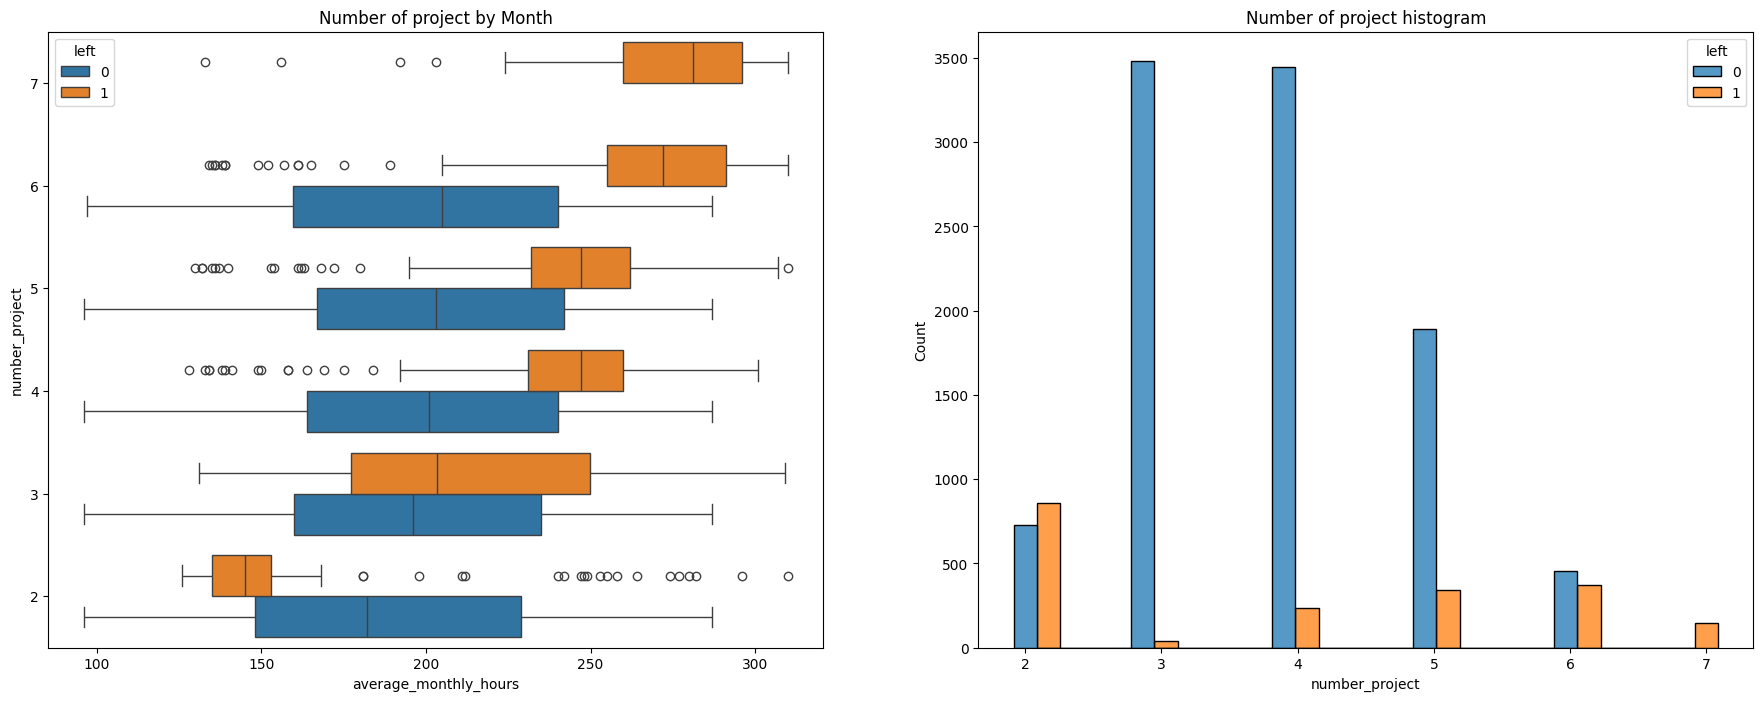

In [ ]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22, 8))
sns.boxplot(data = df1, x = "average_monthly_hours",
            y = "number_project", hue = "left", orient = "h", ax = ax[0])
ax[0].set_title("Number of project by Month")
ax[0].invert_yaxis()

sns.histplot(data =df1, x = "number_project", stat = "count", hue = "left",
             multiple = "dodge", ax = ax[1], shrink = 2)
ax[1].set_title("Number of project histogram")
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

In [ ]:
df1.loc[df1["left"] == 0]["average_monthly_hours"].describe()

count    10000.000000
mean       198.942700
std         45.665507
min         96.000000
25%        162.000000
50%        198.000000
75%        238.000000
max        287.000000
Name: average_monthly_hours, dtype: float64

In [ ]:
df1[df1["number_project"] == 7]["left"].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave.

Next, you could examine the average monthly hours versus the satisfaction levels.

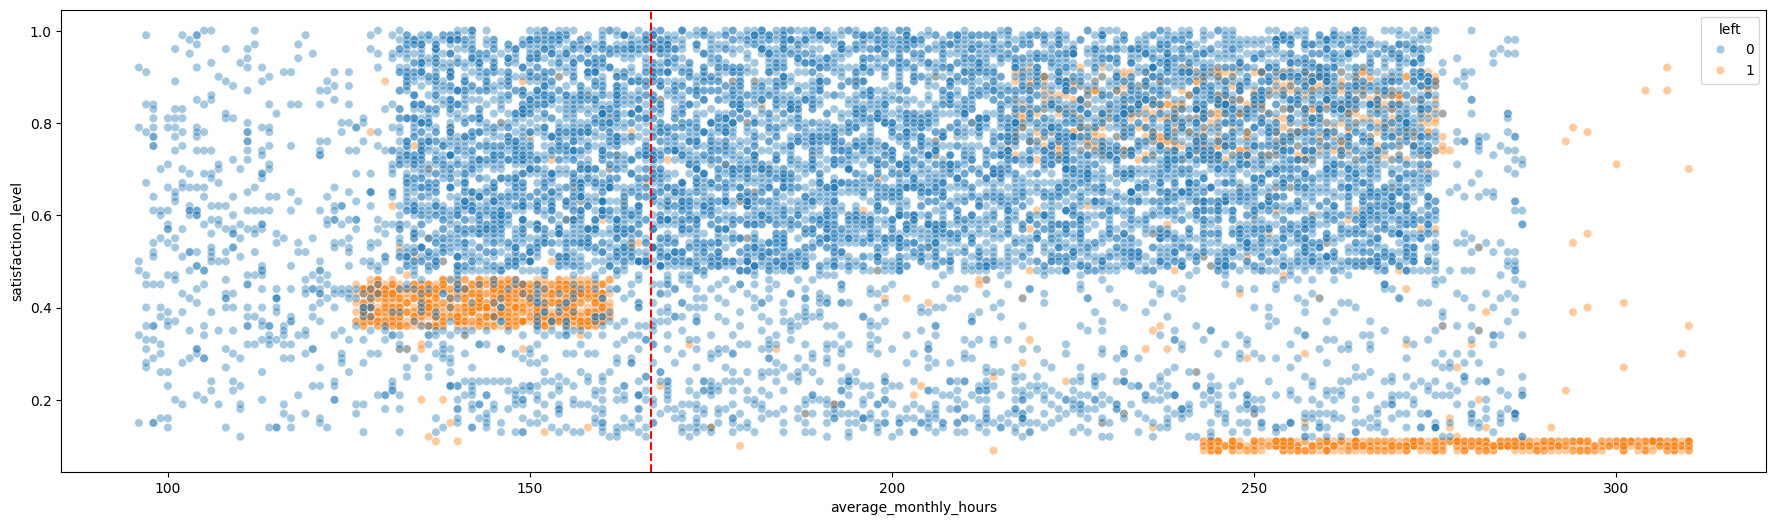

In [ ]:
# Create a plot as needed
fig = plt.figure(figsize = (22, 6))
sns.scatterplot(data = df1, y = "satisfaction_level", x = "average_monthly_hours",
           hue = "left", alpha = 0.4)
plt.axvline(x = 166.67, color = "red", ls = "--")
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

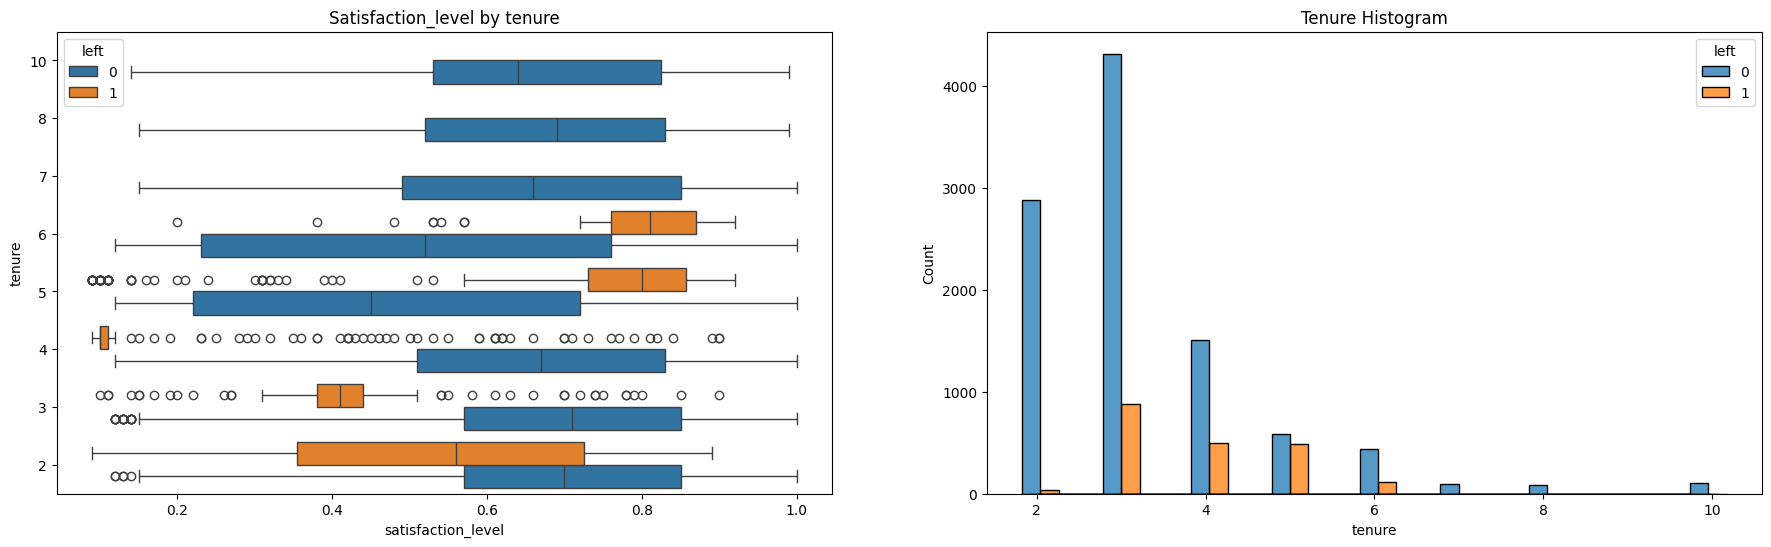

In [ ]:
# Create a plot as needed
fig, ax = plt.subplots(1,2 , figsize = (22, 6))
sns.boxplot(data =df1, y = "tenure", x = "satisfaction_level", hue = "left", orient = "h", ax = ax[0])
ax[0].set_title("Satisfaction_level by tenure")
ax[0].invert_yaxis()

sns.histplot(data = df1, x = "tenure", stat = "count", hue = "left", multiple = "dodge", shrink =5,
            ax = ax[1])
ax[1].set_title("Tenure Histogram")
plt.show()

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [ ]:
df1.groupby(["left"])["satisfaction_level"].agg([np.mean, np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, you could examine salary levels for different tenures.

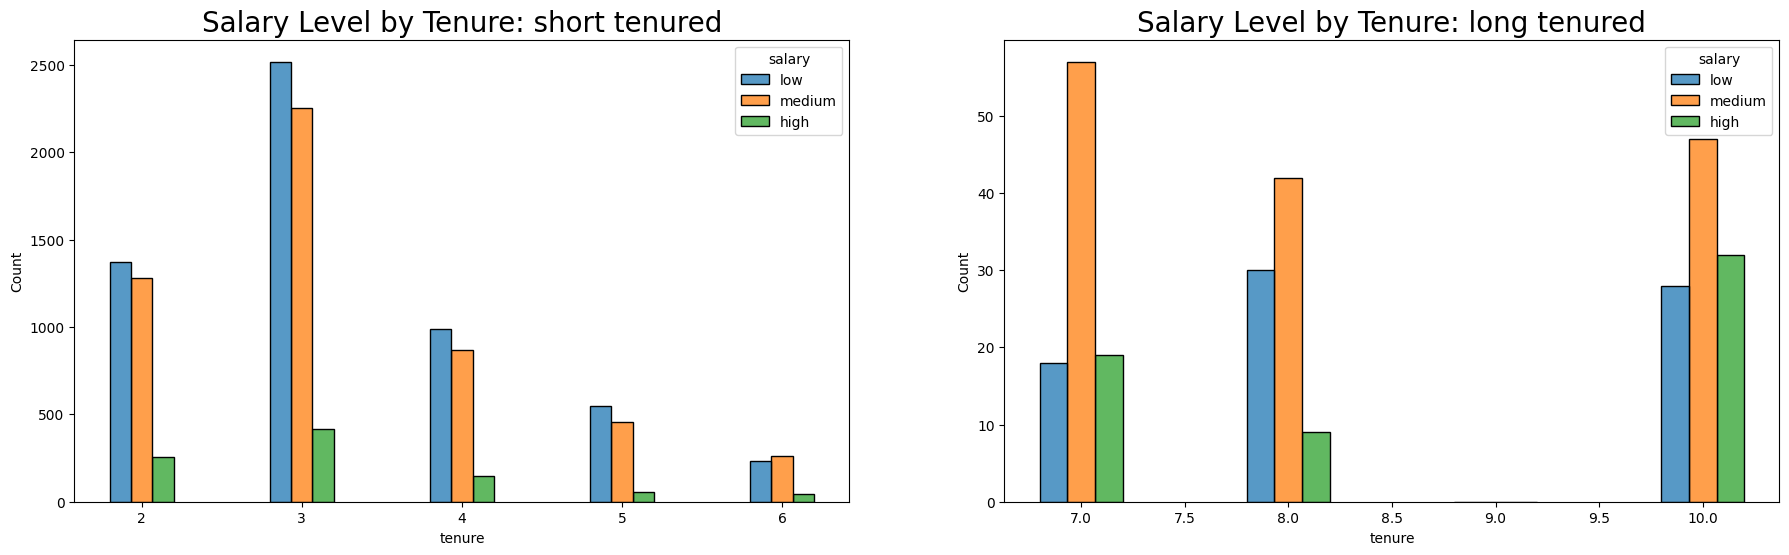

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize = (22,6))

tenure_long = df1.loc[df1["tenure"] > 6]
tenure_short = df1.loc[df1["tenure"] < 7]


sns.histplot(data = tenure_short, x  = "tenure", stat = "count", hue= "salary", ax = ax[0],
             multiple = "dodge", shrink = .4, discrete=1, hue_order = ["low", "medium", "high"])
ax[0].set_title("Salary Level by Tenure: short tenured", fontsize= 20)

sns.histplot(data = tenure_long, x  = "tenure", stat = "count", hue= "salary", ax = ax[1],
             multiple = "dodge", shrink = .4, hue_order = ["low", "medium", "high"], discrete=1)
ax[1].set_title("Salary Level by Tenure: long tenured", fontsize= 20)
plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of average_monthly_hours versus last_evaluation.

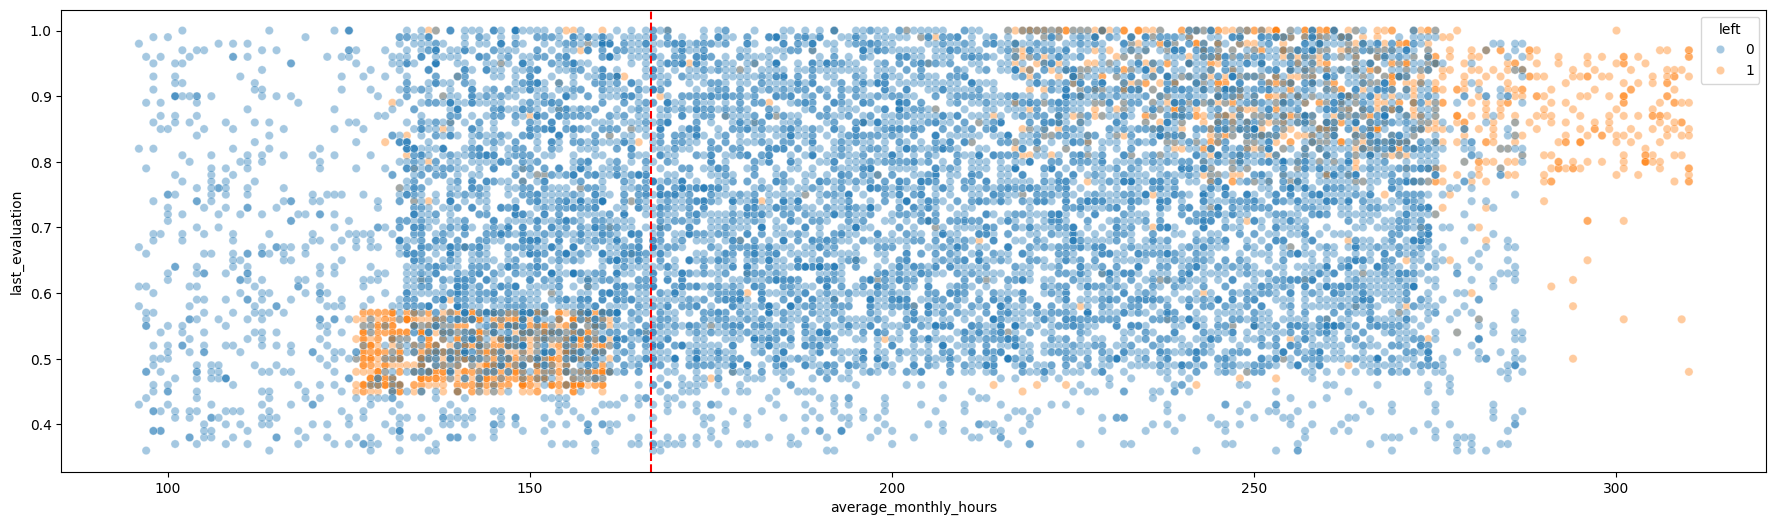

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
fig = plt.figure(figsize = (22,6))
sns.scatterplot(data = df1, y = "last_evaluation", x = "average_monthly_hours",
                alpha=  .4, hue = "left")
plt.axvline(x = 166.67, color = "red", ls = "--")
plt.show()

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

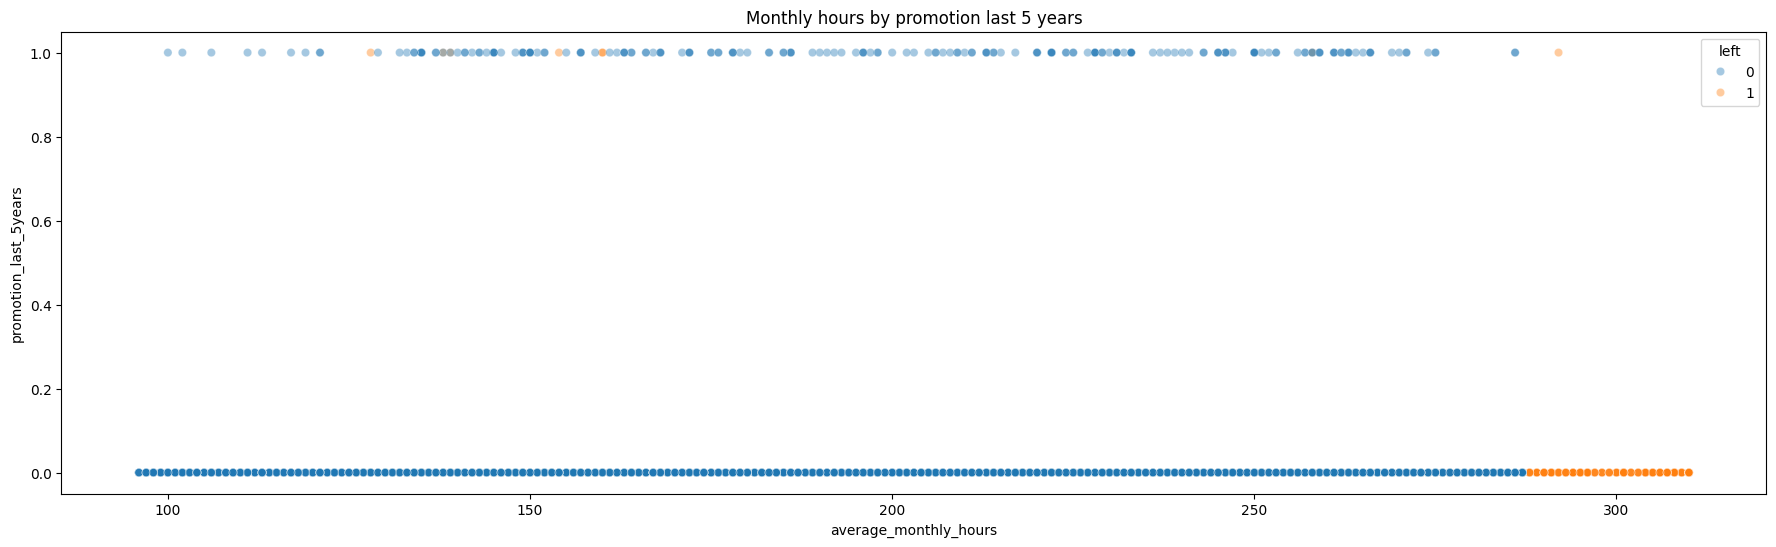

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
fig = plt.figure(figsize  =(22,6))
sns.scatterplot(data = df1, x = "average_monthly_hours", y = "promotion_last_5years", alpha= .4,
                hue = "left")
plt.title("Monthly hours by promotion last 5 years")
plt.show()

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, you could inspect how the employees who left are distributed across departments.

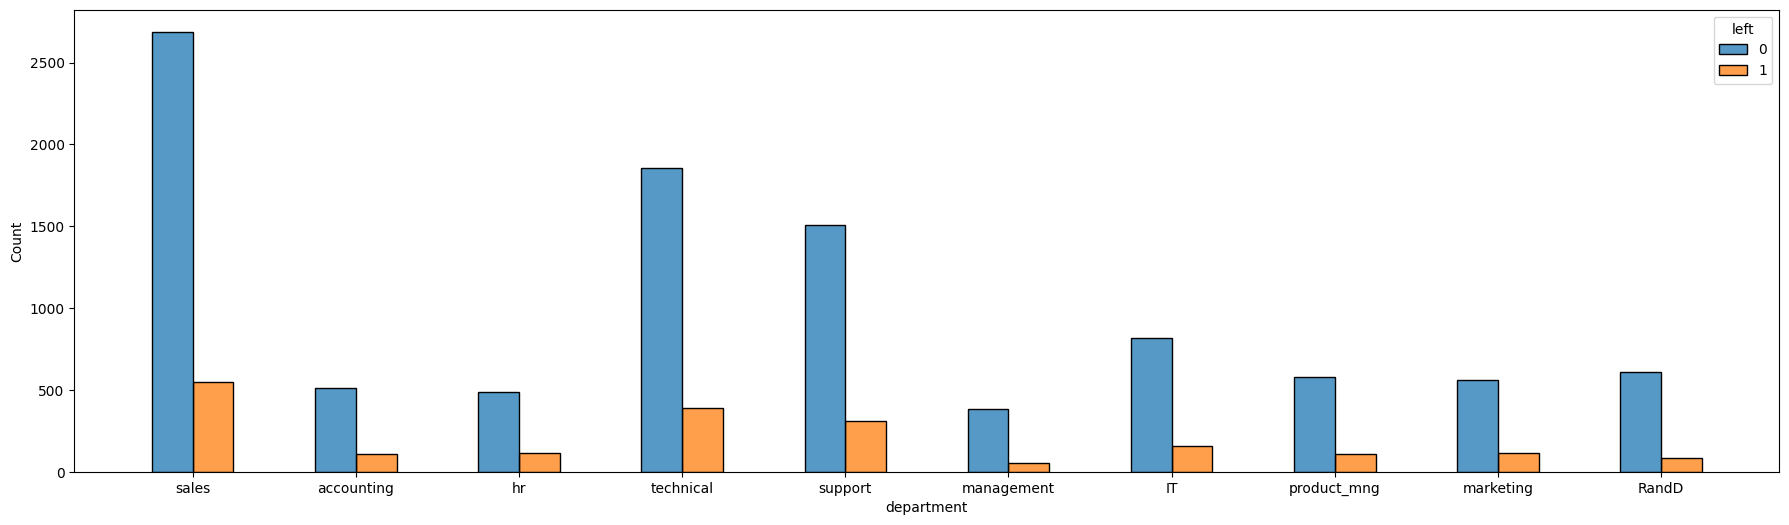

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
fig = plt.figure(figsize = (22,6))
sns.histplot(data= df1, x = "department", stat = "count", multiple = "dodge",
            hue = "left", shrink = .5, discrete = 1, hue_order = [0, 1])
plt.show()

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, you could check for strong correlations between variables in the data.

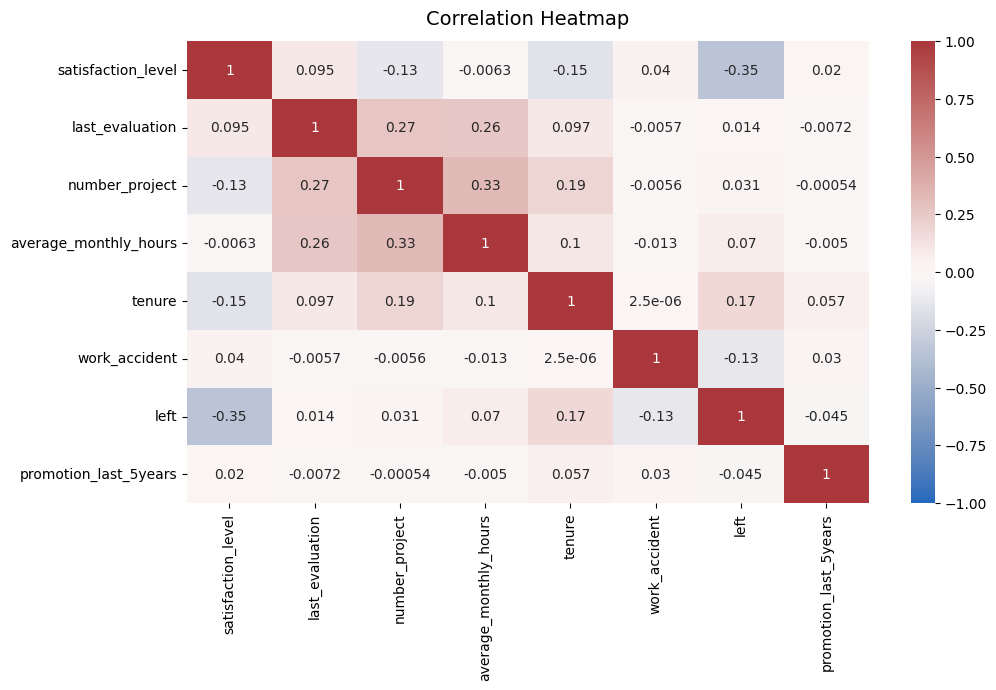

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
fig = plt.figure(figsize = (11,6))
heatmap = sns.heatmap(df1.corr(method = "pearson", numeric_only= True), vmin = -1, vmax = 1, annot = True,
                      cmap = sns.color_palette("vlag", as_cmap = True))
heatmap.set_title("Correlation Heatmap", fontsize = 14, pad = 12)
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

## Construct Stage

In the **Construct** stage, we focus on building and refining predictive models:

1. **Model Selection**:
   - **Choose Models**: Select appropriate models based on the problem type (e.g., logistic regression for binary classification or tree-based models like Random Forest and XGBoost).

2. **Model Construction**:
   - **Train Models**: Fit the chosen models to the training data using the selected features.

3. **Verify Assumptions**:
   - **Check Assumptions**: Ensure that model assumptions (e.g., linearity for logistic regression) are met. For tree-based models, validate that they are not overfitting.

4. **Model Evaluation**:
   - **Performance Metrics**: Assess models using metrics like accuracy, precision, recall, F1-score, and ROC-AUC to evaluate how well they predict employee turnover.

5. **Hyperparameter Tuning**:
   - **Optimize Parameters**: Use techniques like GridSearchCV to find the best hyperparameters for the models.

6. **Feature Importance**:
   - **Assess Importance**: Examine which features are most influential in predicting employee turnover.

This stage ensures that the models are well-built, appropriately tuned, and effectively evaluated.


## Step 3 & 4 Model Building and Evaluation

### 1. Model Building
   - **Fit the Model**: Train the model to predict the target variable using selected independent variables. Choose from appropriate algorithms based on the problem (e.g., logistic regression, decision trees, etc.).
   - **Check Model Assumptions**: Verify that the model assumptions are satisfied. For example, check linearity and independence assumptions for logistic regression, or ensure that decision trees are not overfitting.

### 2. Results and Evaluation
   - **Evaluate Model Performance**: Assess the model’s effectiveness using key performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Analyze these metrics to understand how well the model predicts employee turnover.
   - **Interpret Results**: Interpret the results to identify which variables have the most significant impact on the outcome. Use these insights to provide actionable recommendations for improving employee retention.

These steps ensure that the model is accurately built, validated, and interpreted, providing reliable predictions and insights.


### Identify the type of prediction task.

Goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable that required to predict (whether an employee leaves the company) is categorical, it could be either build a Logistic Regression model, or a Tree-based Machine Learning model.

Hence, it include the two following approaches. Through implementing both and determine how they compare.

### Modeling



### Logistics Regression

Binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`.

`department` is a categorical variable, which means you can dummy it for modeling.

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier

<Axes: ylabel='tenure'>

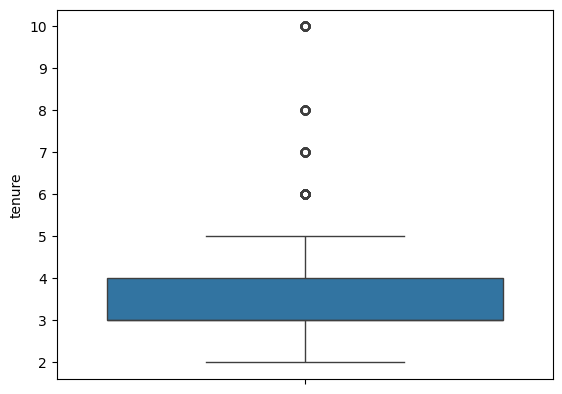

In [ ]:
sns.boxplot(df1["tenure"])

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [ ]:
lr_data = df1.copy()

def outlier_imputer(data, column_list, iqr_factor):
    for column in column_list:
        data.loc[data[column] < 0, column] = 0
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3-q1
        lower_treshold = q1 - (iqr*iqr_factor)
        upper_treshold = q3 + (iqr*iqr_factor)
        print(column)
        print("Q1:", q1)
        print("Q3:", q3)
        print("Lower Treshold:", lower_treshold)
        print("Upper Treshold:", upper_treshold)
        #data.loc[data[column] > q3, column] = upper_treshold
        #data.loc[data[column] < q1, column] = lower_treshold
        data = data[(data[column] >= lower_treshold) & (data[column] <= upper_treshold)]
        print(data[column].describe())
        print()
        return data

lr_data = outlier_imputer(lr_data, ["tenure"], 1.5)

tenure
Q1: 3.0
Q3: 4.0
Lower Treshold: 1.5
Upper Treshold: 5.5
count    11167.000000
mean         3.109161
std          0.899277
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: tenure, dtype: float64



In [ ]:
### YOUR CODE HERE ###
lr_data["left"].value_counts(normalize = True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

#### Check Correlation

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

#### Encode Variable

In [ ]:
df_enc = lr_data.copy()
df_enc["salary"] = (
    df_enc["salary"].astype("category")
    .cat.set_categories(["low", "medium", "high"])
    .cat.codes)
df_enc = pd.get_dummies(df_enc, drop_first = True)
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours   
0                0.38             0.53               2                    157  \
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary   
0       3              0     1                      0       0  \
2       4              0     1                      0       1   
3       5              0     1                      0       0   
4       3              0     1                      0       0   
5       3              0     1                      0       0   

   department_RandD  department_accounting  department_hr   
0             False                  False          False  \
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng   
0                  False                 False                   False  \
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

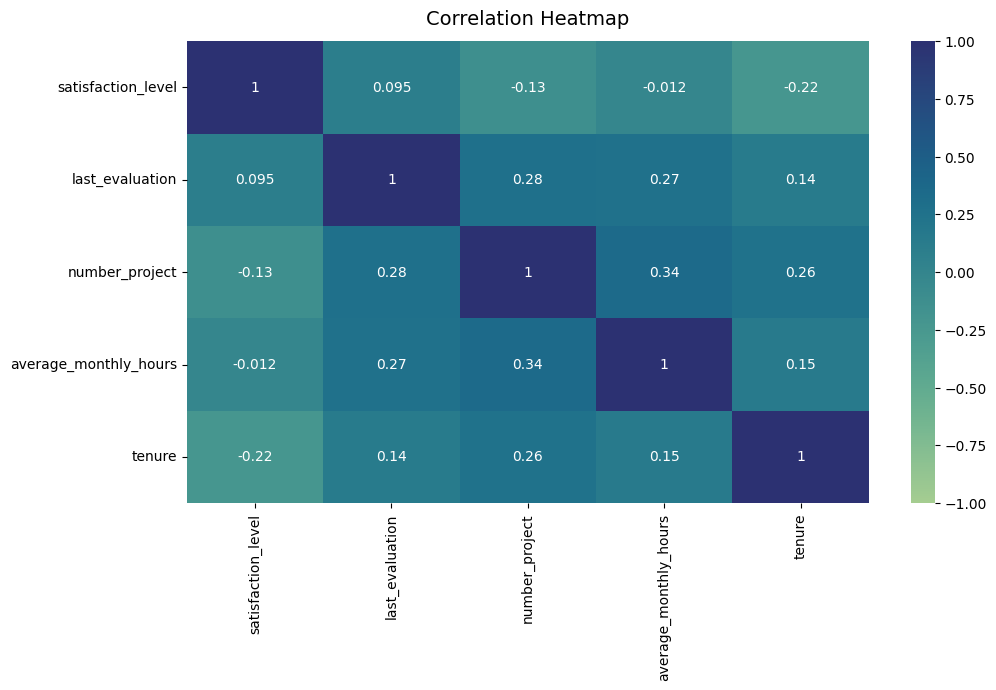

In [ ]:
fig = plt.figure(figsize = (11,6))
heatmap = sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), vmin = -1, vmax = 1, annot = True,
                      cmap = sns.color_palette("crest", as_cmap = True))
heatmap.set_title("Correlation Heatmap", fontsize = 14, pad = 12)
plt.show()

#### Split Feature and Target Variable

Isolate the outcome variable, which is the variable that is needed for the model to predict.

In [ ]:
# Isolate the outcome variable
y = df_enc["left"]

In [ ]:
# Isolate the features
X = df_enc.drop(columns = "left")
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours   
0                0.38             0.53               2                    157  \
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_RandD   
0       3              0                      0       0             False  \
2       4              0                      0       1             False   
3       5              0                      0       0             False   
4       3              0                      0       0             False   
5       3              0                      0       0             False   

   department_accounting  department_hr  department_management   
0                  False          False                  False  \
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   
5                  False          False                  False   

   department_marketing  department_product_mng  department_sales   
0                 False                   False              True  \
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   
5                 False                   False              True   

   department_support  department_technical  
0               False                 False  
2               False                 False  
3               False                 False  
4               False                 False  
5               False                 False

Split the data into training set and testing set. Also, stratify based on the values in y, since the classes are unbalanced.

In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [ ]:
ab = [X_train, X_test]
for x in ab:
    print(len(x))

8375
2792


Construct a logistic regression model and fit it to the training dataset.

In [ ]:
# Construct a logistic regression model and fit it to the training dataset
clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [ ]:
# Use the logistic regression model to get predictions on the test set
lr_pred = clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

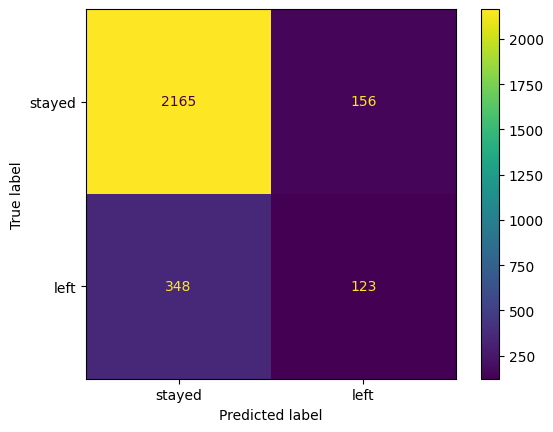

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, lr_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(log_cm, display_labels = ["stayed", "left"])

# Plot confusion matrix
log_disp.plot(values_format= "")

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [ ]:
lr_data['left'].value_counts(normalize=True)*100

left
0    83.146772
1    16.853228
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, it might need to resample the data to make it more balanced. In this case, the data can be use without modifying the class balance and continue evaluating the model.

In [ ]:
target_variables = ["stayed", "left"]
# Create classification report for logistic regression model
print(classification_report(y_test, lr_pred, target_names = target_variables))

# Create a dataframe for the report
ac = accuracy_score(y_test, lr_pred)
pr = precision_score(y_test, lr_pred)
rs = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
roc = roc_auc_score(y_test, lr_pred)
log_clf_result = pd.DataFrame({"Model Name": "Logistic Regression",
                              "accuracy": [ac],
                              "precision": [pr],
                              "recall": [rs],
                              "f1": [f1],
                              "auc": [roc]})
log_clf_result

              precision    recall  f1-score   support

      stayed       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



Model Name  accuracy  precision    recall     f1       auc
0  Logistic Regression  0.819484    0.44086  0.261146  0.328  0.596967

The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

#### Interpret Model Coefficient

In [ ]:
model_coef = pd.DataFrame({"Feature Names" : clf.feature_names_in_,
                          "Coef": clf.coef_[0]})
model_coef.sort_values(by = "Coef", ascending = False)

Feature Names      Coef
4                   tenure  1.101323
15      department_support  0.129105
14        department_sales  0.128467
16    department_technical  0.117626
10           department_hr  0.098128
3    average_monthly_hours  0.003588
13  department_product_mng  0.000205
12    department_marketing -0.013467
1          last_evaluation -0.066210
11   department_management -0.111134
9    department_accounting -0.195247
8         department_RandD -0.226882
2           number_project -0.483286
7                   salary -0.527355
6    promotion_last_5years -1.239312
5            work_accident -1.503437
0       satisfaction_level -4.347715

The feature importance graph seems to confirm that `'tenure'` is the most important features for this model. While `'satisfaction_level'`is a feature with negative influence in this model.

### Modeling Approach A: Decision Tree
This approach covers implementation of Decision Tree and Random Forest.

In [ ]:
dt_data = df1.copy()
dt_data["salary"] = (dt_data["salary"].astype("category")
                     .cat.set_categories(["low", "medium", "high"]).cat.codes)
dt_data = pd.get_dummies(dt_data, drop_first = True)

In [ ]:
# Select the features
X = dt_data.drop(columns = ["left"])

# Isolate the outcome variable
y = dt_data["left"]

Split the data into training, validating, and testing sets.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    test_size= 0.2, random_state = 42)

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
decision_tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [ ]:
%%time
decision_tree1.fit(X_train, y_train)

CPU times: total: 5.09 s
Wall time: 5.91 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
# Check best parameters
decision_tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [ ]:
dt_pred = decision_tree1.predict(X_test)
dt_result = pd.DataFrame({"Model Name": ["Decision Tree"],
                         "accuracy" : [accuracy_score(y_test, dt_pred)],
                         "precision" : [precision_score(y_test, dt_pred)],
                         "recall" : [recall_score(y_test, dt_pred)],
                         "f1": [f1_score(y_test, dt_pred)],
                         "auc": [roc_auc_score(y_test, dt_pred)]})
dt_result

Model Name  accuracy  precision    recall        f1       auc
0  Decision Tree  0.983326   0.971053  0.927136  0.948586  0.960819

All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

### Modeling Approach B: Random Forest
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [ ]:
rf_data = df1.copy()
X = rf_data.drop(columns = ["left"])
y = rf_data["left"]

In [ ]:
X_encod = X.copy()
X_encod["salary"] = (X_encod["salary"].astype("category")
                     .cat.set_categories(["low", "medium", "high"]).cat.codes)
X_encod = pd.get_dummies(X_encod, drop_first = True)
X_encod.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours   
0                0.38             0.53               2                    157  \
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_RandD   
0       3              0                      0       0             False  \
1       6              0                      0       1             False   
2       4              0                      0       1             False   
3       5              0                      0       0             False   
4       3              0                      0       0             False   

   department_accounting  department_hr  department_management   
0                  False          False                  False  \
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales   
0                 False                   False              True  \
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(X_encod, y,
                                              random_state = 42, stratify = y, test_size = 0.2)

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr,
                                              random_state = 42, stratify = y_tr, test_size = 0.25)

In [ ]:
for x in (X_train, X_val, X_test):
    print(len(x))

7194
2398
2399


In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state = 42)

# Assign a dictionary of hyperparameters to search over
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Assign a dictionary of scoring metrics to capture
cv_params = {"n_estimators": [200,250,300],
            "max_depth": [6, 8, None],
            "min_samples_split": [1, 2],
            "min_samples_leaf": [1, 2],
            "max_features":[0.8, 0.9,1.0],
            "max_samples": [1.0]}

# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [ ]:
%%time
rf_cv.fit(X_train, y_train)

e:\python\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "e:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\python\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "e:\python\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "e:\python\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_cons

CPU times: total: 7min 31s
Wall time: 7min 53s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, None],
                         'max_features': [0.8, 0.9, 1.0], 'max_samples': [1.0],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2],
                         'n_estimators': [200, 250, 300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Specify path to where you want to save your model.

Define functions to pickle the model and read in the model.

In [ ]:
import pickle
path = "path/"
def make_pickle(path, model_object, model_name:str):
    with open(path + model_name + ".pickle", "wb") as to_write:
        pickle.dump(model_object, to_write)

def load_pickle(path, model_name:str):
    with open(path + model_name + ".pickle", "rb") as to_read:
        model = pickle.load(to_read)
        return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [ ]:
#Write pickle
make_pickle(path, rf_cv, "rf_cv")

In [ ]:
# Read pickle
rf_cv = load_pickle(path, "rf_cv")

Identify the best AUC score achieved by the random forest model on the training set.

In [ ]:
# Check best AUC score on CV
rf_cv.best_score_

0.9802116817263

Identify the optimal values for the parameters of the random forest model.

In [ ]:
# Check best params
rf_cv.best_params_

{'max_depth': 6,
 'max_features': 0.8,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
def result_maker(model_object, model_name:str, metric:str):
    metric_dict = {"auc" : "mean_test_roc_auc",
                  "accuracy": "mean_test_accuracy",
                  "precision": "mean_test_precision",
                  "recall": "mean_test_recall",
                  "f1": "mean_test_f1"}
    result = pd.DataFrame(model_object.cv_results_)
    best_result = result.loc[result[metric_dict[metric]].idxmax(), :]
    accuracy = best_result["mean_test_accuracy"]
    precision = best_result["mean_test_precision"]
    recall = best_result["mean_test_recall"]
    f1 = best_result["mean_test_f1"]
    auc = best_result["mean_test_roc_auc"]
    table = pd.DataFrame({"Model Name": [model_name],
                         "accuracy" : [accuracy],
                         "precision" : [precision],
                         "recall" : [recall],
                         "f1": [f1],
                         "auc": [auc]})
    return table

In [ ]:
rf_result = result_maker(rf_cv, "Random Forest", "auc")
rf_result

Model Name  accuracy  precision    recall        f1       auc
0  Random Forest    0.9804   0.973156  0.907106  0.938774  0.980212

### Modeling Approach C : XGBoost

In [ ]:
xgb = XGBClassifier(objective = "binary:logistic", random_state = 42)
cv_params_xgb = {"n_estimators" : [200, 250, 300],
                "max_depth" : [6, 8, 10, 12, None],
                "min_child_weight" : [3 ,5],
                "learning_rate": [0.01, 0.1],
                "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
                "subsample": [0.7, 0.8, 0.9, 1.0]}
xgb_cv = GridSearchCV(xgb, cv_params_xgb, scoring = scoring, cv = 4,refit = "roc_auc")

In [ ]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 1h 31min 53s
Wall time: 28min 18s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [6, 8, 10, 12, None],
                         'min_child_weight': [3, 5],
                         'n_estimators': [200, 250, 300],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
make_pickle(path, xgb_cv, "xgb_cv")

In [ ]:
xgb_cv = load_pickle(path, "xgb_cv")

In [ ]:
xgb_cv.best_score_

0.982893855542461

In [ ]:
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 1.0}

In [ ]:
XGB_result = result_maker(xgb_cv, "XGBoost Classifier", "auc")
result = pd.concat([rf_result, XGB_result])
result = pd.concat([dt_result, result])
result = pd.concat([log_clf_result, result])
result

Model Name  accuracy  precision    recall        f1       auc
0  Logistic Regression  0.819484   0.440860  0.261146  0.328000  0.596967
0        Decision Tree  0.983326   0.971053  0.927136  0.948586  0.960819
0        Random Forest  0.980400   0.973156  0.907106  0.938774  0.980212
0   XGBoost Classifier  0.980817   0.973380  0.909609  0.940137  0.982894

The evaluation scores of models shows that it seems Random Forest Model and XGBoost Classifier, with the exception of f1 and auc score. This indicates that the these 2 model mostly outperforms the other two models.

Next, evaluate the these model on the validation set.

#### Test Random Forest Model & XGBoost Classifier with validation set

Define a function that gets all the scores from a model's predictions.

In [ ]:
def get_test_score(y_test, y_pred, model_name:str):

    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    auc=roc_auc_score(y_test, y_pred)
    table = pd.DataFrame({"Model Name": [model_name],
                         "accuracy" : [accuracy],
                         "precision" : [precision],
                         "recall" : [recall],
                         "f1": [f1],
                         "auc": [auc]})
    return table

Now use the best performing models to predict on the validation set.

In [ ]:
rf_val = rf_cv.best_estimator_.predict(X_val)
rf_val_result = get_test_score(y_val, rf_val, "RF Val")
rf_val_result

Model Name  accuracy  precision    recall        f1       auc
0     RF Val  0.982485   0.965969  0.927136  0.946154  0.960318

In [ ]:
xgb_val = xgb_cv.best_estimator_.predict(X_val)
xgb_val_result = get_test_score(y_val, xgb_val, "XGB Val")
xgb_val_result
val_result = pd.concat([rf_val_result, xgb_val_result])
val_result

Model Name  accuracy  precision    recall        f1       auc
0     RF Val  0.982485   0.965969  0.927136  0.946154  0.960318
0    XGB Val  0.981651   0.970745  0.917085  0.943152  0.955793

Based on the validation set test scores are very similar, which is good. These models appear to be a strong model. Since this validation set was only used for these models, hence, it can be more confident that these models' performance on this data is representative of how it will perform on new, unseeen data. However, based on these result, we can see that Random Forest model is seems to be have a slight better overall score except for precision score, hence, Random Forest model is the clear champion.

Next, use the champion model to predict on the test dataset. This is to give a final indication of how we should expect the model to perform on new future data, should we decide to use the model.

#### Model Selection

In [ ]:
rf_final_predict = rf_cv.best_estimator_.predict(X_test)
rf_final_result = get_test_score(y_test, rf_final_predict, "RF Final test")
rf_final_result

Model Name  accuracy  precision    recall        f1       auc
0  RF Final test  0.982493   0.968421  0.924623  0.946015  0.959313

The overall score was almost exactly the same as it was on the validation data, but the auc declined notably. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

Plot a confusion matrix of the champion model's predictions on the test data.

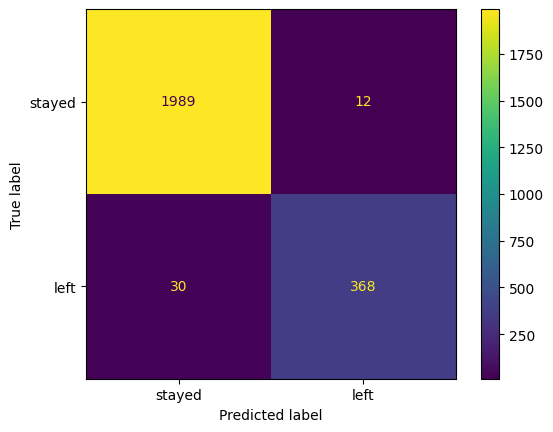

In [ ]:
cm = confusion_matrix(y_test, rf_final_predict)
disp = ConfusionMatrixDisplay(cm, display_labels = ["stayed", "left"])
disp.plot()

The model predicted 7.53% of the false negatives and it correctly identified almost 92.47% of the employees who actually left.

#### **Feature importances of champion model**

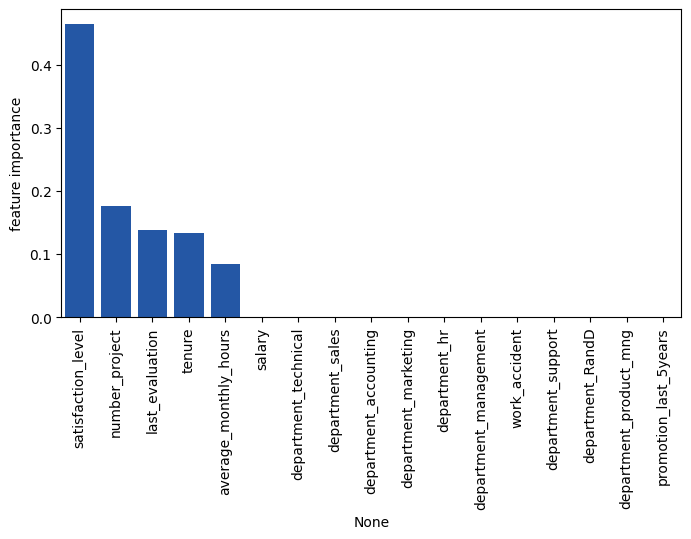

In [ ]:
importance = rf_cv.best_estimator_.feature_importances_
series = pd.Series(importance, index= X_test.columns)
series  = series.to_frame(name = "feature importance")
series = series.sort_values(by = "feature importance", ascending = False)
fig = plt.figure(figsize = (8,4))
sns.barplot(data = series , x = series.index, y = "feature importance", color = "#0F52BA")
plt.xticks(rotation = 90)
plt.show()

As what we concludes in the EDA process, the most predictive features includes the `satisfaction_level`, `number_project`, `last_evaluation`, `tenure` and `average_monthly_hours`

## Feature Engeneering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [ ]:
df2 = df1.copy()
df2

satisfaction_level  last_evaluation  number_project   
0                    0.38             0.53               2  \
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_monthly_hours  tenure  work_accident  left   
0                        157       3              0     1  \
1                        262       6              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
...                      ...     ...            ...   ...   
11995                    259      10              1     0   
11996                    266      10              0     0   
11997                    185      10              0     0   
11998                    172      10              0     0   
11999                    180       3              0     0   

       promotion_last_5years  department  salary  
0                          0       sales     low  
1                          0       sales  medium  
2                          0       sales  medium  
3                          0       sales     low  
4                          0       sales     low  
...                      ...         ...     ...  
11995                      1  management    high  
11996                      1  management    high  
11997                      1  management    high  
11998                      1   marketing    high  
11999                      0          IT     low  

[11991 rows x 10 columns]

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

It could be defined being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, reassign the column using a boolean mask.
- `['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0`

In [ ]:
df2["overworked"] = df2["average_monthly_hours"]

In [ ]:
df2["overworked"] = df2["overworked"].apply(lambda x: 1 if x >= 175 else 0)
df2["overworked"]

0        0
1        1
2        1
3        1
4        0
        ..
11995    1
11996    1
11997    1
11998    0
11999    1
Name: overworked, Length: 11991, dtype: int64

Drop the `average_monthly_hours` column.

In [ ]:
df2 = df2.drop(columns = ["average_monthly_hours", "satisfaction_level"])

In [ ]:
df2["salary"] = (df2["salary"].astype("category")
                 .cat.set_categories(["low", "medium", "high"])
                 .cat.codes)

In [ ]:
df2 = pd.get_dummies(df2, drop_first = True)

### Modeling Approach A: Decision Tree (2)

In [ ]:
X = df2.drop(columns = "left")
y = df2["left"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2,
                                                    random_state = 42)


In [ ]:
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
dt_2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
dt_2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
dt_2_pred = dt_2.predict(X_test)

In [ ]:
dt_2_result = get_test_score(y_test, dt_2_pred, "Decision Tree")
dt_2_result

Model Name  accuracy  precision    recall        f1      auc
0  Decision Tree  0.948729   0.796976  0.927136  0.857143  0.94008

This model performs well, even without satisfaction levels and detailed hours worked data.

In [ ]:
dt_result

Model Name  accuracy  precision    recall        f1       auc
0  Decision Tree  0.983326   0.971053  0.927136  0.948586  0.960819

Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are still acceptable.

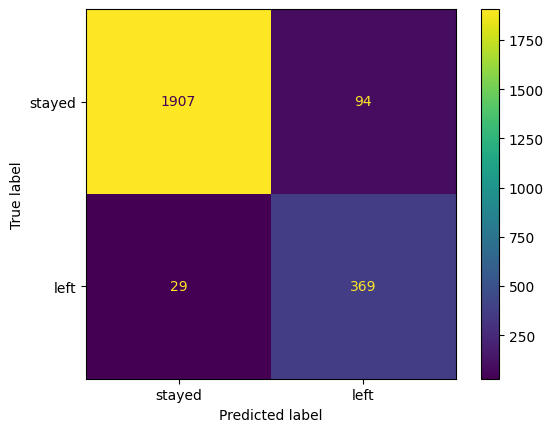

In [ ]:
cm = confusion_matrix(y_test, dt_2_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = ["stayed", "left"])
disp.plot()

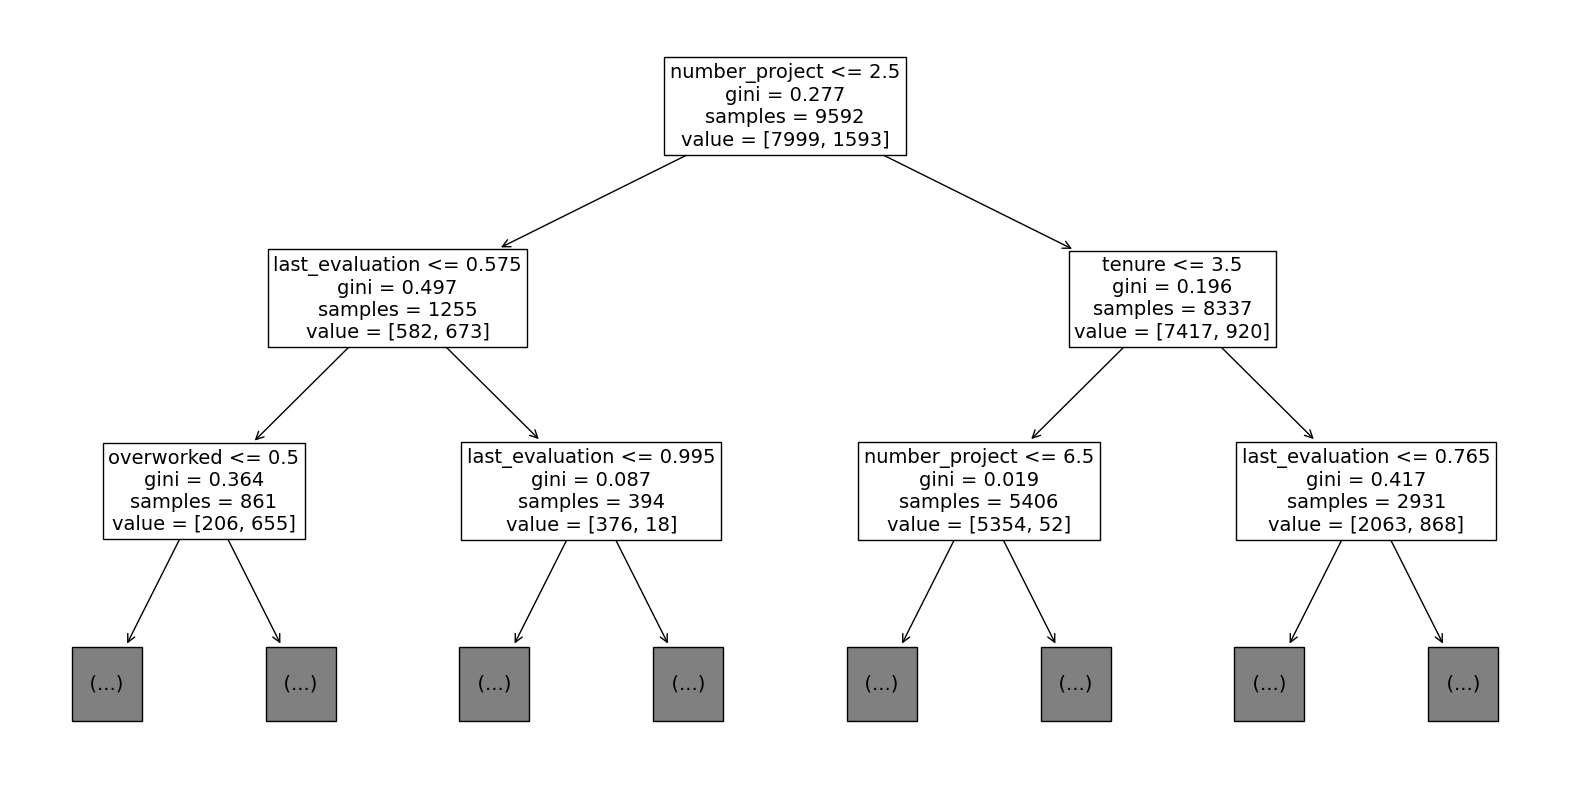

In [ ]:
fig = plt.figure(figsize = (20, 10))
plot_tree(dt_2.best_estimator_, max_depth = 2, fontsize = 14, feature_names = X.columns)
plt.show()

### Modeling Approach B: Random Forest (2)

In [ ]:
rf2_data = df2.copy()
X = rf2_data.drop(columns = "left")
y = rf2_data["left"]

In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(X,y, stratify = y, random_state = 42, test_size = 0.2)
X_train, X_val, y_train, y_val  = train_test_split(X_tr,y_tr, stratify = y_tr,
                                                   random_state = 42, test_size = 0.25)

In [ ]:
for x in [X_train, X_val, X_test]:
    print(len(x))

7194
2398
2399


In [ ]:
rf2 = RandomForestClassifier(random_state = 42)
cv_params = {"n_estimators": [150, 200,250],
            "max_depth": [5, 6, 7],
            "min_samples_split": [2, 3],
            "min_samples_leaf": [2, 3],
            "max_features":[0.7, 0.8, 0.9],
            "max_samples": [1.0]}
rf2_cv = GridSearchCV(rf2, cv_params, scoring = scoring, cv = 4, refit = "roc_auc")

In [ ]:
%%time
rf2_cv.fit(X_train, y_train)

CPU times: total: 7min 20s
Wall time: 8min 38s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7],
                         'max_features': [0.7, 0.8, 0.9], 'max_samples': [1.0],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [150, 200, 250]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
make_pickle(path, rf2_cv, "rf2_cv")

In [ ]:
rf2_cv = load_pickle(path, "rf2_cv")

In [ ]:
rf2_cv.best_params_

{'max_depth': 5,
 'max_features': 0.7,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
rf2_cv.best_score_

0.9672840197942811

In [ ]:
rf2_result = result_maker(rf2_cv, "Random Forest 2", "auc")
rf2_result

Model Name  accuracy  precision    recall        f1       auc
0  Random Forest 2  0.959271   0.881533  0.871953  0.876365  0.967284

Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

### Modeling Approach C : XGBoost (2)

In [ ]:
xgb2 = XGBClassifier(objective = "binary:logistic", random_state = 42)
cv_params_xgb = {"n_estimators" : [150, 200, 250],
                "max_depth" : [5, 6, 7],
                "min_child_weight" : [2, 3, 4],
                "learning_rate": [0.1],
                "colsample_bytree": [0.6, 0.7],
                "subsample": [1.0]}
xgb2_cv = GridSearchCV(xgb2, cv_params_xgb, scoring = scoring, refit = "roc_auc", cv =4)

In [ ]:
xgb2_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.6, 0.7], 'learning_rate': [0.1],
                         'max_depth': [5, 6, 7], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [150, 200, 250], 'subsample': [1.0]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
make_pickle(path, xgb2_cv, "xgb2_cv")

In [ ]:
xgb2_cv = load_pickle(path, "xgb2_cv")

In [ ]:
xgb2_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 150,
 'subsample': 1.0}

In [ ]:
xgb2_cv.best_score_

0.9716090949442042

In [ ]:
xgb2_result = result_maker(xgb2_cv, "XGboost 2", "auc")
xgb2_result

Model Name  accuracy  precision    recall        f1       auc
0  XGboost 2  0.961773   0.901455  0.864414  0.882298  0.971609

Again, just like the scores for decision trees and random forests, the XGBoost scores dropped slightly as well.

In [ ]:
second_result = pd.concat([dt_2_result, rf2_result])
second_result = pd.concat([second_result, xgb2_result])
second_result

Model Name  accuracy  precision    recall        f1       auc
0    Decision Tree  0.948729   0.796976  0.927136  0.857143  0.940080
0  Random Forest 2  0.959271   0.881533  0.871953  0.876365  0.967284
0        XGboost 2  0.961773   0.901455  0.864414  0.882298  0.971609

Based on the results, we can see that after feature engineers, the XGBoost model seems to be the clear champion among the other models.

Hence, let's test the model with the validation set.

### Validation Set (2)

In [ ]:
rf2_pred = rf2_cv.best_estimator_.predict(X_val)
rf2_pred_result = get_test_score(y_val, rf2_pred, "Random Forest 2 Val")

xgb2_pred = xgb2_cv.best_estimator_.predict(X_val)
xgb2_pred_result = get_test_score(y_val, xgb2_pred, "XGBoost 2 Val")

val_set_result = pd.concat([rf2_pred_result, xgb2_pred_result])
second_result = pd.concat([second_result, val_set_result])
second_result

Model Name  accuracy  precision    recall        f1       auc
0        Decision Tree  0.948729   0.796976  0.927136  0.857143  0.940080
0      Random Forest 2  0.959271   0.881533  0.871953  0.876365  0.967284
0            XGboost 2  0.961773   0.901455  0.864414  0.882298  0.971609
0  Random Forest 2 Val  0.954962   0.889785  0.831658  0.859740  0.905579
0        XGBoost 2 Val  0.964971   0.902564  0.884422  0.893401  0.932711

After the validation set test, XGBoost model still have a better overall score when compared to the other model.

Hence, we will choose XGBoost model to be evaluated by the test set.

#### Model Selection (2)

In [ ]:
xgb2_final_pred = xgb2_cv.predict(X_test)
xgb2_final_pred_result = get_test_score(y_test, xgb2_final_pred, "XGBoost Final Test Pred 2")
final2_result = pd.concat([second_result, xgb2_final_pred_result])
final2_result

Model Name  accuracy  precision    recall        f1   
0              Decision Tree  0.948729   0.796976  0.927136  0.857143  \
0            Random Forest 2  0.959271   0.881533  0.871953  0.876365   
0                  XGboost 2  0.961773   0.901455  0.864414  0.882298   
0        Random Forest 2 Val  0.954962   0.889785  0.831658  0.859740   
0              XGBoost 2 Val  0.964971   0.902564  0.884422  0.893401   
0  XGBoost Final Test Pred 2  0.967486   0.904040  0.899497  0.901763   

        auc  
0  0.940080  
0  0.967284  
0  0.971609  
0  0.905579  
0  0.932711  
0  0.940253

The overall score by using the test set is slightly better than the score using the validation set, XGBoost seems to be a stable model that we can use in the future.

In [ ]:
rf_final_result

Model Name  accuracy  precision    recall        f1       auc
0  RF Final test  0.982493   0.968421  0.924623  0.946015  0.959313

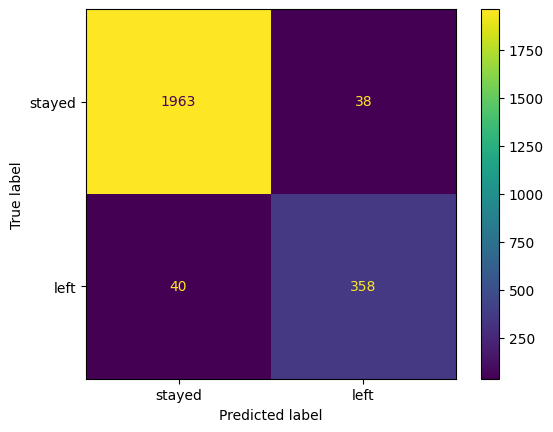

In [ ]:
cm = confusion_matrix(y_test, xgb2_final_pred)
disp = ConfusionMatrixDisplay(cm, display_labels = ["stayed", "left"])
disp.plot()

When compared with the champion model before the feature engineer, the model after feature engineer, the performance is slightly dropped.

Random Forest Model (Champion model before feature engineer)
The model predicted 7.53% of the false negatives and it correctly identified almost 92.47% of the employees who actually left.

XGBoost Model (Champion model after feature engineer)
The model predicted 9.54% of the false negatives and it correctly identified almost 90.46% of the employees who actually left.

This two model seems to be stable, well-performing final models.

For exploratory purpose, we might want to inspect the splits of the decision tree model and the most important features in the random forest model and XGBoost Model.

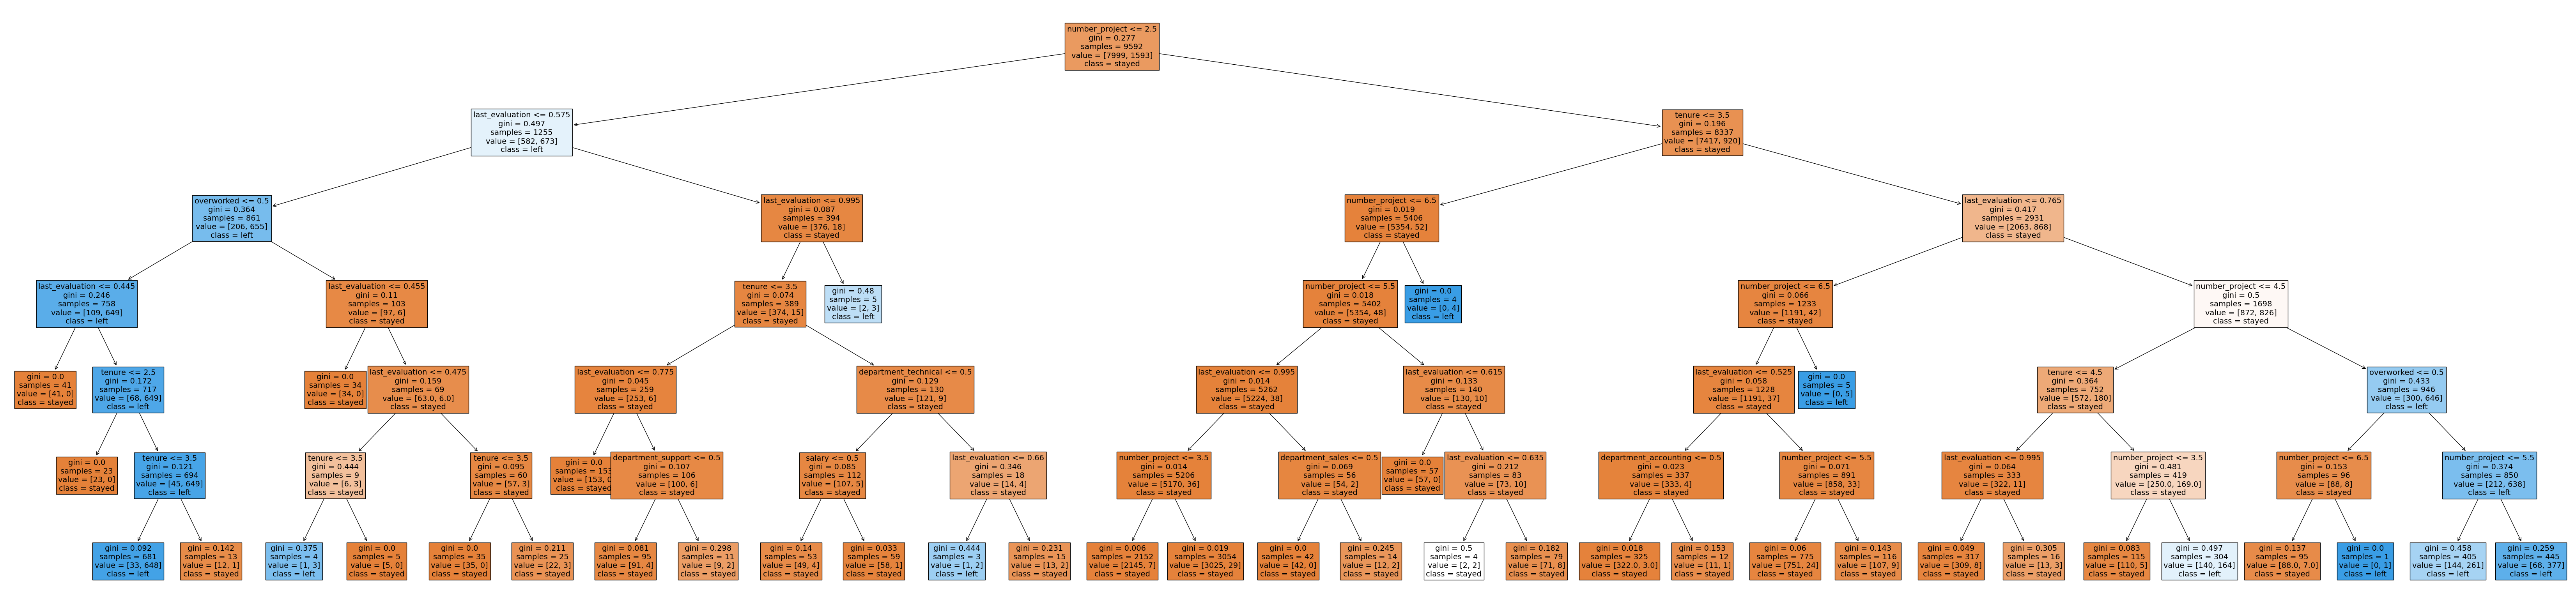

In [ ]:
plt.figure(figsize = (85, 20))
plot_tree(dt_2.best_estimator_, max_depth = 6, fontsize = 14, feature_names = X.columns,
         class_names = {0: "stayed", 1: "left"}, filled = True);

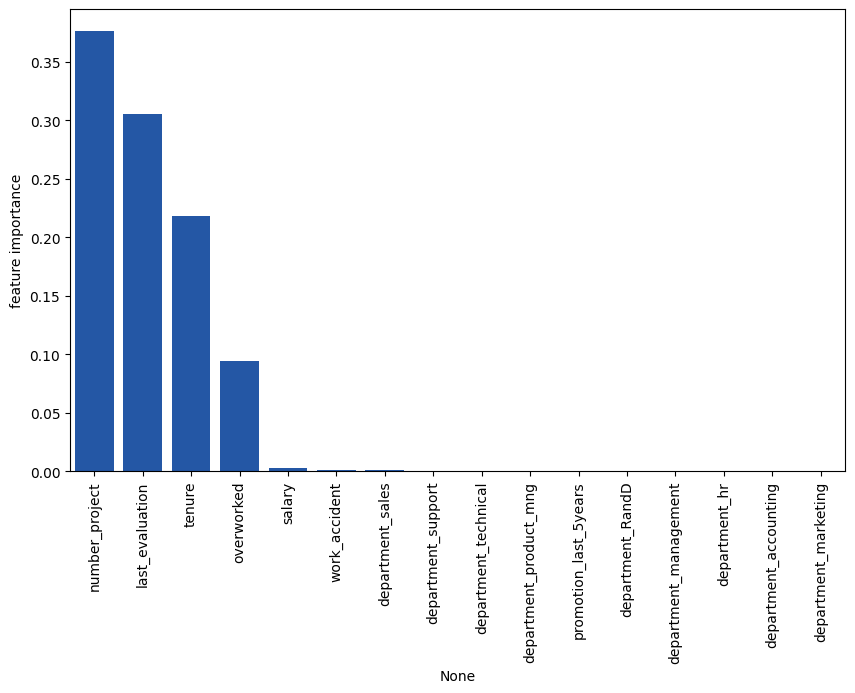

In [ ]:
importance = rf2_cv.best_estimator_.feature_importances_
series = pd.Series(importance, index = X.columns)
series = series.to_frame(name = "feature importance")
series = series.sort_values(by = "feature importance", ascending = False)
fig = plt.figure(figsize = (10, 6))
sns.barplot(data = series, x = series.index, y = series["feature importance"], color = "#0F52BA")
plt.xticks(rotation = 90)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

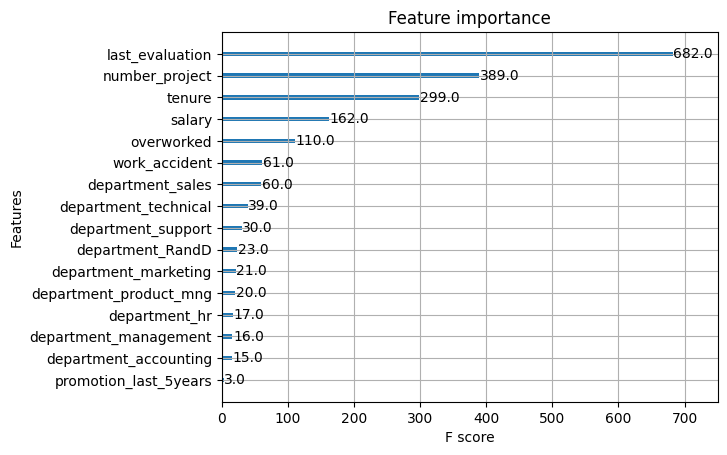

In [ ]:
plot_importance(xgb2_cv.best_estimator_)

The plot above shows that in this random forest model, `last_evaluation`, `tenure`,`number_project`,  `salary` and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the almost identical as the model before feature engineer.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Machine Learning model**

After conducting feature engineering, the XGBoost model achieved AUC of 94.3%, precision of 90.6%, recall of 90.4%, f1-score of 90.5%, and accuracy of 96.8%, on the test set. The XGBoost modestly outperformed the decision tree and random forest model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, the team could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.